In [1]:
!pip install yfinance
!pip install yahooquery
!pip install tvdatafeed
!pip install tensorflow
!pip install mplfinance
!pip install cairocffi
from tvDatafeed import TvDatafeed, Interval
from yahooquery import Screener
import yfinance as yf   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random 
from tensorflow.keras.models import load_model
import os
import shutil
import mplfinance as mpl 
from datetime import datetime
import glob
from PIL import Image
import cv2
%matplotlib notebook
import gc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('agg')
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,AveragePooling2D,GlobalAveragePooling2D
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def work_with_dir():
  if os.path.exists("/content/data/"):
    shutil.rmtree("/content/data/", ignore_errors=True)
    print("Data Folder Removed")
    os.mkdir("/content/data/")
  if not os.path.exists("/content/data/"):
    os.mkdir("/content/data/")
  if not os.path.exists("/content/extracted/"):
    os.mkdir("/content/extracted/")
  if not os.path.exists("/content/checkpoints/"):
    os.mkdir("/content/checkpoints/")
def get_crypto_syms():
   screens = [
       'all_cryptocurrencies_us', 'all_cryptocurrencies_au', 'all_cryptocurrencies_ca', 'all_cryptocurrencies_eu', 'all_cryptocurrencies_gb', 'all_cryptocurrencies_in', ]
   s = Screener()
   symbols = []
   for i in screens:
      data = s.get_screeners(i, count=250)
      dicts = data[i]['quotes']
      syms = [d['symbol'] for d in dicts]
      for sym in syms:
        symbols.append(sym)
   return symbols
def download_data(symbols, periodd, intervall):
  indexx = 100
  work_with_dir()
  for symbol in symbols:
    if ((symbols.index(symbol)+1) % 100 == 0):
      print(f" -- {indexx}", end="")
      indexx = indexx + 100
    try:
        data = yf.download(symbol, period=periodd,
                           interval=intervall, progress=False, show_errors=False)
        if data.empty:
           pass
        else:
            data.to_csv(f"/content/data/{symbol}.csv")
    except:
       print("Error!")
  print(" ")
def extract_data(how_many_future_candles, how_many_past_candles, each_row_past):
  print(f"Files In Data : {len(os.listdir('/content/data/'))}")
  pd.options.mode.chained_assignment = None
  files = os.listdir("/content/data/")
  print("Processing File:")
  now = datetime.now().strftime("%H%M%S")
  os.mkdir(f"/content/extracted/{now}/")
  index = 1
  for file in files:
     print(f"File Number {index}:", end=" ")
     each_file_proc(file, now, how_many_future_candles,
                    how_many_past_candles, each_row_past)
     index = index + 1
  print(" ")
  return now
def each_file_proc(file, now, how_many_future_candles, how_many_past_candles, each_row_past):
    address = f"/content/data/{file}"
    data = pd.read_csv(address)
    if len(data.columns) == 7:
      data = data.iloc[:, 1:]
    data = np.array(data)
    data = data.astype(float)
    max_index = data.shape[0]-which_future_or_past
    for i in range(each_row_past,max_index):
        rows = data[i-each_row_past:i, :]

        next_candles = []
        for z in range(0, how_many_future_candles):
          next_candles.append(data[i+z][3]-data[i+z][0])
        next_candles = sum(next_candles)
        if next_candles > 0:
          sugg = 1
        else:
          sugg = 0

        df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close","Adj Close","Volume"])

        df.index.name = "Date"

        df.index = pd.to_datetime(df.index)
        right_now = datetime.now().strftime("%H%M%S%f")
        address = f"/content/extracted/{now}/{right_now}_{sugg}.png"
        

        fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
        
        fig.savefig(address)
        fig.clf()

        if i % 10 == 0:
            print(f"{i}/{max_index}", end=" ")
        if i % 20:
          plt.close("all")
        if i % 270 ==0:
          print("")
    plt.close("all")
    print("")

def start(how_many_future_candles, how_many_past_candles, each_row_past):
    folder_name = extract_data(
        how_many_future_candles, how_many_past_candles, each_row_past)
    return folder_name

In [3]:
symbols = get_crypto_syms()
print(f"Symbols : {len(symbols)}")
symbols = ["btc-usd","eth-usd","trx-usd","ltc-usd","xrp-usd","bnb-usd"]
download_data(symbols,"max","1d")

Symbols : 1500
Data Folder Removed
 


In [3]:
how_many_future_candles = 25
how_many_past_candles = 1
each_row_past = 90


global which_future_or_past
which_future_or_past = None
if how_many_future_candles > how_many_past_candles:
    which_future_or_past = how_many_future_candles
else:
    which_future_or_past = how_many_past_candles
folder_name = start(how_many_future_candles,how_many_past_candles,each_row_past)
len(os.listdir(f"/content/extracted/{folder_name}"))

Files In Data : 6
Processing File:
File Number 1: 90/2851 100/2851 110/2851 120/2851 130/2851 140/2851 150/2851 160/2851 170/2851 180/2851 190/2851 200/2851 210/2851 220/2851 230/2851 240/2851 250/2851 260/2851 270/2851 
280/2851 290/2851 300/2851 310/2851 320/2851 330/2851 340/2851 350/2851 360/2851 370/2851 380/2851 390/2851 400/2851 410/2851 420/2851 430/2851 440/2851 450/2851 460/2851 470/2851 480/2851 490/2851 500/2851 510/2851 520/2851 530/2851 540/2851 
550/2851 560/2851 570/2851 580/2851 590/2851 600/2851 610/2851 620/2851 630/2851 640/2851 650/2851 660/2851 670/2851 680/2851 690/2851 700/2851 710/2851 720/2851 730/2851 740/2851 750/2851 760/2851 770/2851 780/2851 790/2851 800/2851 810/2851 
820/2851 830/2851 840/2851 850/2851 860/2851 870/2851 880/2851 890/2851 900/2851 910/2851 920/2851 930/2851 940/2851 950/2851 960/2851 970/2851 980/2851 990/2851 1000/2851 1010/2851 1020/2851 1030/2851 1040/2851 1050/2851 1060/2851 1070/2851 1080/2851 
1090/2851 1100/2851 1110/2851 1120/285

11970

In [4]:
#folder_name = "162812"

shutil.make_archive(folder_name,"zip",f"/content/extracted/{folder_name}/")
#shutil.unpack_archive(f"/content/{folder_name}.zip",f"/content/extracted/{folder_name}")
label = []
data  = []
files = os.listdir(f"/content/extracted/{folder_name}/")
for i, image_name in enumerate(files):
  if image_name.split(".")[1] == "png":
    image = cv2.imread(f"/content/extracted/{folder_name}"+"/"+image_name,0)
    dim = (128, 128)
    resized = cv2.resize(image, dim)
    data.append(np.array(resized))
    sugg = image_name.split("_")[1].split(".")[0]
    label.append(int(sugg))
data = np.array(data)
data = data / 255
print(data.shape)
xTrain , xTest , yTrain , yTest = train_test_split(data,label,test_size=0.2,random_state=99)
data = None
label = None
print(f"xTrain : {len(xTrain)} \\ xTest : {len(xTest)}")
nytrain = []
nytest = []
yn = 0
nn = 0
for i in yTrain:
  if i == 1:
    nytrain.append([1,0])
    yn += 1
  else:
    nytrain.append([0,1])
    nn += 1
for i in yTest:
  if i == 1:
    nytest.append([1,0])
    yn += 1
  else:
    nytest.append([0,1])
    nn += 1
yTrain = np.array(nytrain)
yTest = np.array(nytest)
print(f"yn: {yn} nn: {nn}")

(11970, 128, 128)
xTrain : 9576 \ xTest : 2394
yn: 6216 nn: 5754


In [ ]:
model.evaluate(xTest,yTest)

In [5]:
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(128,   (3,3),activation="relu", input_shape=(xTrain.shape[1], xTrain.shape[2],1), kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100,   (3,3),activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,    (3,3),activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005))) 
model.add(Flatten())
model.add(Dense(800,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(800,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(800,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(800,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dense(2,activation="sigmoid"))

adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.0002)
model.compile(loss='categorical_crossentropy',
              optimizer=adamax,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 100)       115300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        28832     
                                                                 
 flatten (Flatten)           (None, 25088)             0

In [6]:
filepath = "/content/checkpoints/{epoch:02d}-{val_accuracy:.2f}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#model.fit(xTrain,yTrain,batch_size=64,epochs=30,validation_data=(xTest,yTest), callbacks=model_checkpoint_callback)
model.fit(xTrain,yTrain,batch_size=32,epochs=50,validation_data=(xTest,yTest))

Epoch 1/50
300/300 [==============================] - 33s 59ms/step - loss: 0.8165 - accuracy: 0.5169 - val_loss: 0.7888 - val_accuracy: 0.5560
Epoch 2/50
300/300 [==============================] - 17s 56ms/step - loss: 0.7619 - accuracy: 0.6013 - val_loss: 0.7423 - val_accuracy: 0.6387
Epoch 3/50
300/300 [==============================] - 17s 56ms/step - loss: 0.6950 - accuracy: 0.6697 - val_loss: 0.6578 - val_accuracy: 0.7168
Epoch 4/50
300/300 [==============================] - 17s 58ms/step - loss: 0.5500 - accuracy: 0.7827 - val_loss: 0.5160 - val_accuracy: 0.8087
Epoch 5/50
300/300 [==============================] - 17s 57ms/step - loss: 0.3803 - accuracy: 0.8818 - val_loss: 0.3865 - val_accuracy: 0.8780
Epoch 6/50
300/300 [==============================] - 17s 57ms/step - loss: 0.2747 - accuracy: 0.9270 - val_loss: 0.3331 - val_accuracy: 0.9056
Epoch 7/50
300/300 [==============================] - 18s 61ms/step - loss: 0.2223 - accuracy: 0.9458 - val_loss: 0.3323 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
model.save(f"1.h5")

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
2022-07-23 00:00:00+00:00  22701.097656  22784.156250  22633.107422   
2022-07-23 01:00:00+00:00  22769.445312  22835.929688  22769.445312   
2022-07-23 02:00:00+00:00  22789.802734  22885.261719  22789.802734   
2022-07-23 03:00:00+00:00  22840.515625  22887.355469  22830.691406   
2022-07-23 04:00:00+00:00  22833.572266  22962.953125  22770.201172   
...                                 ...           ...           ...   
2022-08-01 17:00:00+00:00  23199.355469  23199.355469  22942.851562   
2022-08-01 18:00:00+00:00  22971.015625  22992.982422  22890.796875   
2022-08-01 19:00:00+00:00  22962.234375  23012.230469  22936.394531   
2022-08-01 20:00:00+00:00  22963.669922  22973.173828  22963.669922   
2022-08-01 20:07:00+00:00  22974.019531  22974.019531  22974.019531   

                                  Close     Adj Close      Volume  
2022-07-23

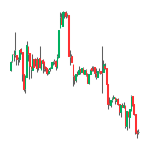

In [7]:
symbol,period,interval="btc-usd","10d","1h"
data = yf.download(tickers=symbol,period=period,interval=interval)
print(data)
data = np.array(data)
data = data.astype(float)
i = -1
rows = data[i-each_row_past:i, :]
df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close","Adj Close","Volume"])
df.index.name = "Date"
df.index = pd.to_datetime(df.index)
fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
fig.savefig("picture.png")

In [8]:
image = cv2.imread("/content/picture.png",0)
dim = (128, 128)
resized = cv2.resize(image, dim)
data = np.array(resized)
model.predict([[data.reshape(1,128,128,1)]])

array([[1., 0.]], dtype=float32)

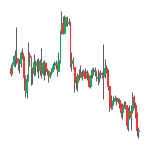

In [10]:
tv = TvDatafeed()
data = tv.get_hist(symbol="btcusdt",exchange="binance",interval=Interval.in_1_hour,n_bars=1000)
data = np.array(data)
i = -1
rows = data[i-each_row_past:i, 1:5]
rows.shape
df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close"])
df.index.name = "Date"
df.index = pd.to_datetime(df.index)
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
fig.savefig("picture1.png")

In [11]:
image = cv2.imread("/content/picture1.png",0)
dim = (128, 128)
resized = cv2.resize(image, dim)
data = np.array(resized)
model.predict([[data.reshape(1,128,128,1)]])

array([[1., 0.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
lst = []
while True:
  ans = input()
  if ans == "exit":
    break
  lst.append(int(ans))
print(sum(max),len(lst))